# Виконання

## Завдання четверте

### Для початку імпортуємо модулі. Завантажимо датафрейм та виведемо його вміст.

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

mall_data = pd.read_csv('data/Mall_Customers.xls')
mall_data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
133,134,Female,31,72,71
152,153,Female,44,78,20
23,24,Male,31,25,73
75,76,Male,26,54,54
81,82,Male,38,54,55
196,197,Female,45,126,28
12,13,Female,58,20,15
185,186,Male,30,99,97
38,39,Female,36,37,26
127,128,Male,40,71,95


## KMEANS

### Натренуємо модель.

In [12]:
from sklearn.cluster import KMeans
X_numerics = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
KM_6_clusters = KMeans(n_clusters=6, init='k-means++').fit(X_numerics)
KM6_clustered = X_numerics.copy()
KM6_clustered.loc[:,'Cluster'] = KM_6_clusters.labels_

/home/sideshowbobgot/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


*Тренування моделі*

### Зобразимо кластери

TypeError: scatterplot() got multiple values for argument 'data'

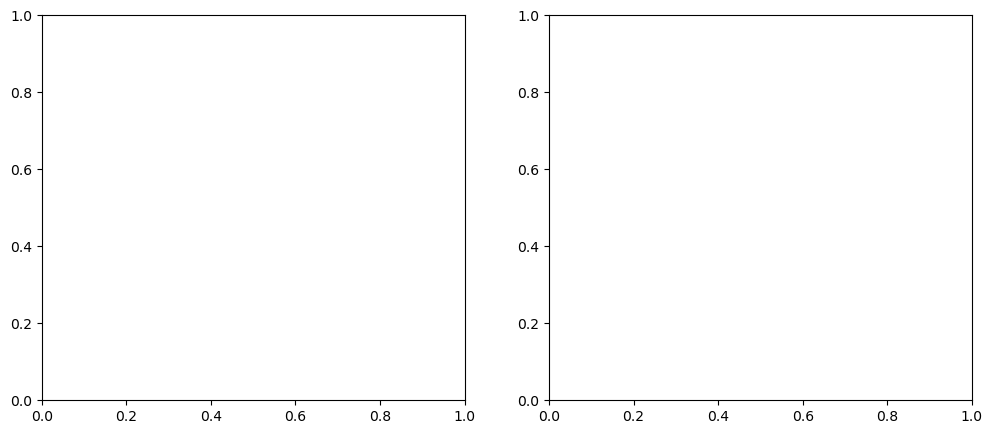

In [13]:
fig11, (axes) = plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(KM6_clustered, 'Annual Income (k$)', 'Spending Score (1-100)',
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')
sns.scatterplot(KM6_clustered, 'Age', 'Spending Score (1-100)',
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')
axes[0].scatter(KM_6_clusters.cluster_centers_[:,1], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_6_clusters.cluster_centers_[:,0], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()